In [1]:
from gensim.models import Word2Vec

In [2]:
text = "When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton. Bilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure."

In [3]:
from nltk import sent_tokenize, word_tokenize

In [8]:
sentences = [word_tokenize(sent) for sent in sent_tokenize(text)]
print(sentences)

[['When', 'Mr.', 'Bilbo', 'Baggins', 'of', 'Bag', 'End', 'announced', 'that', 'he', 'would', 'shortly', 'be', 'celebrating', 'his', 'eleventy-first', 'birthday', 'with', 'a', 'party', 'of', 'special', 'magnificence', ',', 'there', 'was', 'much', 'talk', 'and', 'excitement', 'in', 'Hobbiton', '.'], ['Bilbo', 'was', 'very', 'rich', 'and', 'very', 'peculiar', ',', 'and', 'had', 'been', 'the', 'wonder', 'of', 'the', 'Shire', 'for', 'sixty', 'years', ',', 'ever', 'since', 'his', 'remarkable', 'disappearance', 'and', 'unexpected', 'return', '.'], ['The', 'riches', 'he', 'had', 'brought', 'back', 'from', 'his', 'travels', 'had', 'now', 'become', 'a', 'local', 'legend', ',', 'and', 'it', 'was', 'popularly', 'believed', ',', 'whatever', 'the', 'old', 'folk', 'might', 'say', ',', 'that', 'the', 'Hill', 'at', 'Bag', 'End', 'was', 'full', 'of', 'tunnels', 'stuffed', 'with', 'treasure', '.']]


In [10]:
model = Word2Vec(sentences, min_count=1)
print(model)

Word2Vec<vocab=73, vector_size=100, alpha=0.025>


In [11]:
model.wv.key_to_index

{',': 0,
 'and': 1,
 'the': 2,
 'was': 3,
 'of': 4,
 '.': 5,
 'had': 6,
 'his': 7,
 'he': 8,
 'a': 9,
 'with': 10,
 'that': 11,
 'very': 12,
 'End': 13,
 'Bag': 14,
 'Bilbo': 15,
 'Hobbiton': 16,
 'in': 17,
 'excitement': 18,
 'talk': 19,
 'rich': 20,
 'much': 21,
 'there': 22,
 'treasure': 23,
 'magnificence': 24,
 'special': 25,
 'party': 26,
 'birthday': 27,
 'eleventy-first': 28,
 'celebrating': 29,
 'be': 30,
 'shortly': 31,
 'would': 32,
 'announced': 33,
 'Baggins': 34,
 'Mr.': 35,
 'peculiar': 36,
 'been': 37,
 'stuffed': 38,
 'old': 39,
 'local': 40,
 'legend': 41,
 'it': 42,
 'popularly': 43,
 'believed': 44,
 'whatever': 45,
 'folk': 46,
 'now': 47,
 'might': 48,
 'say': 49,
 'Hill': 50,
 'at': 51,
 'full': 52,
 'tunnels': 53,
 'become': 54,
 'travels': 55,
 'wonder': 56,
 'remarkable': 57,
 'Shire': 58,
 'for': 59,
 'sixty': 60,
 'years': 61,
 'ever': 62,
 'since': 63,
 'disappearance': 64,
 'from': 65,
 'unexpected': 66,
 'return': 67,
 'The': 68,
 'riches': 69,
 'brought'

In [12]:
model.wv['Bilbo']

array([-7.1930937e-03,  4.2344136e-03,  2.1560106e-03,  7.4445093e-03,
       -4.8893397e-03, -4.5736535e-03, -6.0905940e-03,  3.3143591e-03,
       -4.5073787e-03,  8.5184220e-03, -4.2917989e-03, -9.1123236e-03,
       -4.8151067e-03,  6.4205308e-03, -6.3667702e-03, -5.2658445e-03,
       -7.3029995e-03,  6.0189203e-03,  3.3533075e-03,  2.8385986e-03,
       -3.1323405e-03,  6.0320543e-03, -6.1440514e-03, -1.9830416e-03,
       -5.9860498e-03, -9.9548372e-04, -2.0294846e-03,  8.4919548e-03,
        7.2603747e-05, -8.5748648e-03, -5.4260376e-03, -6.8744519e-03,
        2.6985148e-03,  9.4505027e-03, -5.8150794e-03,  8.2690697e-03,
        8.5364822e-03, -7.0622633e-03, -8.8903746e-03,  9.4729681e-03,
        8.3724819e-03, -4.6874429e-03, -6.7278077e-03,  7.8430334e-03,
        3.7672014e-03,  8.0895051e-03, -7.5767017e-03, -9.5263701e-03,
        1.5837271e-03, -9.8021170e-03, -4.8796600e-03, -3.4673447e-03,
        9.6228886e-03,  8.6138230e-03, -2.8274958e-03,  5.8242148e-03,
      

In [13]:
model.save('model.bin')

In [14]:
new_model = Word2Vec.load('model.bin')

In [15]:
model.wv.save_word2vec_format('model.txt', binary=False)

In [16]:
from gensim.models import KeyedVectors
new_model = KeyedVectors.load_word2vec_format('model.txt', binary=False)

In [18]:
import matplotlib.pyplot as plt

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(model.wv.vectors)

## plot two of the dimentions of the normalized encodings

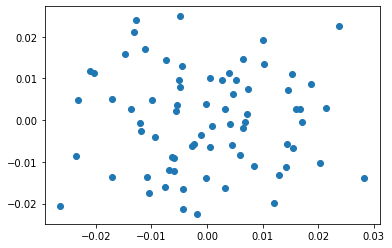

In [27]:
plt.scatter(result[:,0], result[:,1])